# MNIST Dynamic Filter Classification

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

This notebook uses TensorFlow2.x.

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


####[MDF-01]
Import modules and set random seeds.

In [2]:
import os, random
os.environ['PYTHONHASHSEED']=str(20230515)
random.seed(20230515)

import numpy as np
from pandas import DataFrame

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist

np.random.seed(20190222)
tf.random.set_seed(20190222)

####[MDF-02]
Download the MNIST dataset and store into NumPy arrays.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11490434/11490434 [==============================] - 0s 0us/step


####[MDF-03]
Define a CNN model with a single convolutional filter layer.

In [4]:
model = models.Sequential()
model.add(layers.Reshape((28, 28, 1), input_shape=(28*28,), name='reshape'))
model.add(layers.Conv2D(16, (5, 5), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(1024, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv_filter (Conv2D)        (None, 28, 28, 16)        416       
                                                                 
 max_pooling (MaxPooling2D)  (None, 14, 14, 16)        0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 hidden (Dense)              (None, 1024)              3212288   
                                                                 
 softmax (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,222,954
Trainable params: 3,222,954
Non-

####[MDF-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [5]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['acc'])

####[MDF-05]
Train the model. It achieves around 99% accuracy.

In [6]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 15s 6ms/step - loss: 0.1752 - acc: 0.9481 - val_loss: 0.0590 - val_acc: 0.9814
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0516 - acc: 0.9840 - val_loss: 0.0472 - val_acc: 0.9843
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0326 - acc: 0.9894 - val_loss: 0.0435 - val_acc: 0.9851
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0218 - acc: 0.9929 - val_loss: 0.0352 - val_acc: 0.9878
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0151 - acc: 0.9953 - val_loss: 0.0363 - val_acc: 0.9885
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0108 - acc: 0.9966 - val_loss: 0.0383 - val_acc: 0.9883
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0091 - acc: 0.9969 - val_loss: 0.0350 - val_acc: 0.9904
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0

####[MDF-06]
Plot charts for the accuracy and loss values.

<Axes: >

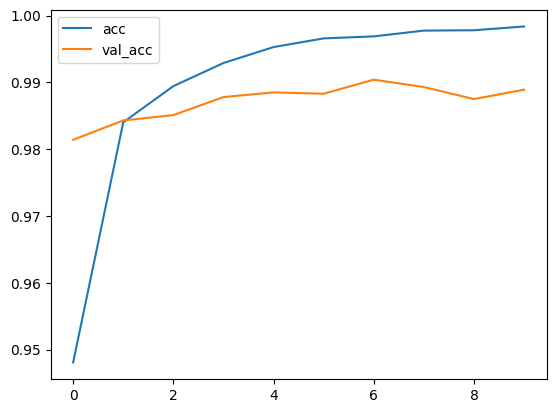

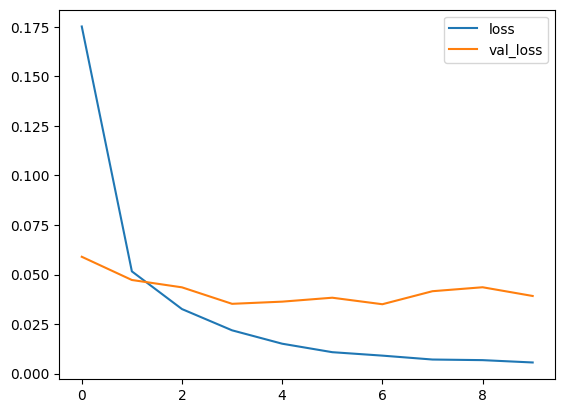

In [7]:
DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot()
DataFrame({'loss': history.history['loss'], 
           'val_loss': history.history['val_loss']}).plot()

####[MDF-07]
Mount your Google Drive on `/content/gdrive`.

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


####[MDF-08]
Export the trained model as a file `MNIST_single.hd5` on your Google Drive.

In [9]:
model.save('/content/gdrive/My Drive/MNIST_single.hd5', save_format='h5')
!ls -lh '/content/gdrive/My Drive/MNIST_single.hd5'

-rw------- 1 root root 37M May 15 02:28 '/content/gdrive/My Drive/MNIST_single.hd5'
